<a href="https://colab.research.google.com/github/galudSla/stroke-prediction/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler

In [58]:
url = 'https://raw.githubusercontent.com/galudSla/stroke-prediction/main/healthcare-dataset-stroke-data.csv'
df_4 = pd.read_csv(url)
test_data = df_4[df_4['bmi'].isnull()]
train_data = df_4.dropna()
x_train = train_data.drop(['id','bmi'], axis=1)
y_train = train_data['bmi']
x_test = test_data.drop(['id','bmi'], axis=1)
y_test = test_data['bmi']

Manual Label Encoding - Ordered data

In [59]:
x_train.smoking_status = x_train.smoking_status.map({
    'Unknown': 0,
    'never smoked': 1,
    'formerly smoked': 2,
    'smokes': 3,
})

Label Encoding - Binary Data (unordered) Category Coding


In [60]:
attributes = list(x_train.columns)
for i in range(len(attributes)):
    if x_train.dtypes[i] ==  'object' and attributes[i] != 'smoking_status':
        x_train[attributes[i]] = x_train[attributes[i]].astype('category')
        x_train[attributes[i]] = x_train[attributes[i]].cat.codes

Feature Scaling - MinMaxScaler normalization

In [61]:
cols = ['smoking_status','work_type','avg_glucose_level','age' ]
x_train[cols] = MinMaxScaler(feature_range=(0, 1)).fit_transform(x_train[cols])

Manual Label Encoding - Ordered data

In [62]:
x_test.smoking_status = x_test.smoking_status.map({
    'Unknown': 0,
    'never smoked': 1,
    'formerly smoked': 2,
    'smokes': 3,
})

Label Encoding - Binary Data (unordered) Category Coding

In [63]:
attributes = list(x_test.columns)
for i in range(len(attributes)):
    if x_test.dtypes[i] ==  'object' and attributes[i] != 'smoking_status':
        x_test[attributes[i]] = x_test[attributes[i]].astype('category')
        x_test[attributes[i]] = x_test[attributes[i]].cat.codes

Feature Scaling - MinMaxScaler normalization

In [64]:
cols = ['smoking_status','work_type','avg_glucose_level','age' ]
x_test[cols] = MinMaxScaler(feature_range=(0, 1)).fit_transform(x_test[cols])

Fit kNN model

In [68]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
df_4.loc[df_4['bmi'].isnull(), 'bmi'] = y_pred

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn


In [70]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

Manual Label Encoding - Ordered data

In [71]:
df_4.smoking_status = df_4.smoking_status.map({
    'Unknown': 0,
    'never smoked': 1,
    'formerly smoked': 2,
    'smokes': 3,
})

Label Encoding - Binary Data (unordered) Category Coding

In [72]:
attributes = list(df_4.columns)
for i in range(len(attributes)):
    if df_4.dtypes[i] ==  'object' and attributes[i] != 'smoking_status':
        df_4[attributes[i]] = df_4[attributes[i]].astype('category')
        df_4[attributes[i]] = df_4[attributes[i]].cat.codes


In [73]:
df_4 = df_4.drop(['id'],axis='columns')

In [74]:
x_train, x_test, y_train, y_test = train_test_split(df_4.drop(['stroke'],axis='columns'), df_4.stroke, test_size=0.25)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1214
           1       0.33      0.02      0.03        64

    accuracy                           0.95      1278
   macro avg       0.64      0.51      0.50      1278
weighted avg       0.92      0.95      0.93      1278



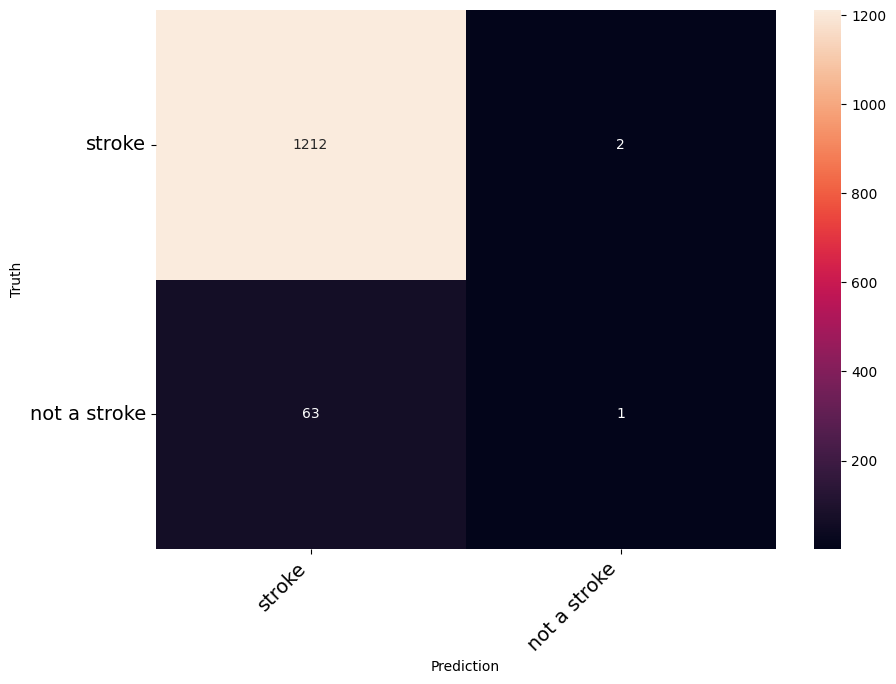

In [75]:
cm = confusion_matrix(y_test, y_pred)
print_confusion_matrix(cm, ['stroke','not a stroke'])
print(classification_report(y_test, y_pred))